In [ ]:
# Install and Import Libraries
!pip install pulp --quiet
from pulp import LpProblem, LpMinimize, LpVariable, lpSum, LpStatus, value

In [ ]:
# Define Parameters
 # Days of the week
days = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

# Minimum required agents per day
demand = {"Mon": 17, "Tue": 13, "Wed": 15, "Thu": 19, "Fri": 14, "Sat": 16, "Sun": 11}

# Define which shifts (5-day spans) cover each day
shifts = {
    "Mon": ["Mon", "Tue", "Wed", "Thu", "Fri"],
    "Tue": ["Tue", "Wed", "Thu", "Fri", "Sat"],
    "Wed": ["Wed", "Thu", "Fri", "Sat", "Sun"],
    "Thu": ["Thu", "Fri", "Sat", "Sun", "Mon"],
    "Fri": ["Fri", "Sat", "Sun", "Mon", "Tue"],
    "Sat": ["Sat", "Sun", "Mon", "Tue", "Wed"],
    "Sun": ["Sun", "Mon", "Tue", "Wed", "Thu"]
}

In [ ]:
# Define Decision Variables
x = {day: LpVariable(f"Start_{day}", lowBound=0, cat='Integer') for day in days}

In [ ]:
# Minimize total number of agents
model = LpProblem("Workforce_Scheduling", LpMinimize)
model += lpSum(x[day] for day in days), "Total_Agents"

In [ ]:
# For each day, ensure enough agents are available
for day in days:
    model += lpSum(x[start_day] for start_day in days if day in shifts[start_day]) >= demand[day], f"Staff_{day}"

In [ ]:
# Solve the Model
model.solve()

1

In [ ]:
print(f"Status: {LpStatus[model.status]}")
for day in days:
    print(f"Agents starting on {day}: {x[day].varValue:.0f}")
print(f"\n Minimum agents needed: {value(model.objective):.0f}")

Status: Optimal
Agents starting on Mon: 7
Agents starting on Tue: 3
Agents starting on Wed: 2
Agents starting on Thu: 7
Agents starting on Fri: 1
Agents starting on Sat: 3
Agents starting on Sun: 0

 Minimum agents needed: 23


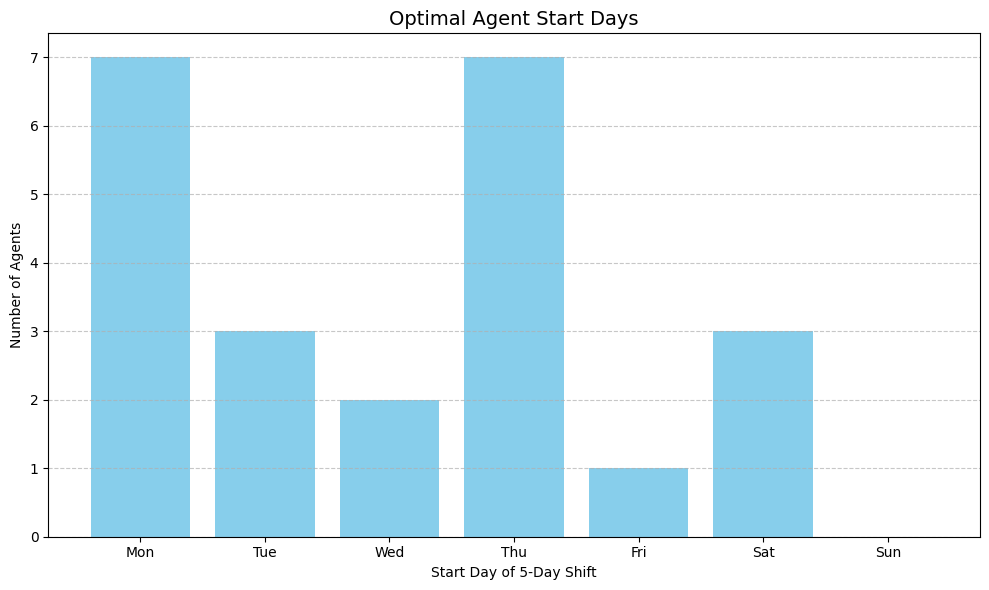

In [ ]:
import matplotlib.pyplot as plt

# Extract values for plotting
start_days = list(x.keys())
agents = [x[day].varValue for day in start_days]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(start_days, agents, color='skyblue')
plt.title("Optimal Agent Start Days", fontsize=14)
plt.xlabel("Start Day of 5-Day Shift")
plt.ylabel("Number of Agents")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

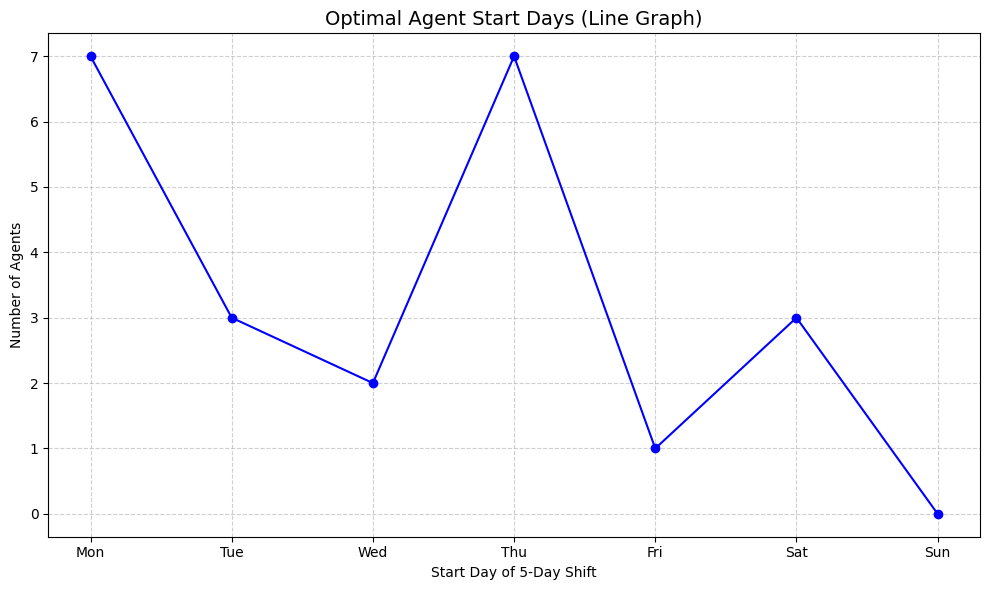

In [ ]:
start_days = list(x.keys())
agents = [x[day].varValue for day in start_days]

plt.figure(figsize=(10, 6))
plt.plot(start_days, agents, marker='o', linestyle='-', color='blue')
plt.title("Optimal Agent Start Days (Line Graph)", fontsize=14)
plt.xlabel("Start Day of 5-Day Shift")
plt.ylabel("Number of Agents")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()